In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [7]:
df['yearMonth'] = "01-"+df["month"].astype(str)+"-"+df["year"].astype(str)
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [10]:
df.set_index('yearMonth',inplace = True)
df.head()

,year,month,passengers
yearMonth,,,
01-Jan-1949,1949,Jan,112
01-Feb-1949,1949,Feb,118
01-Mar-1949,1949,Mar,132
01-Apr-1949,1949,Apr,129
01-May-1949,1949,May,121


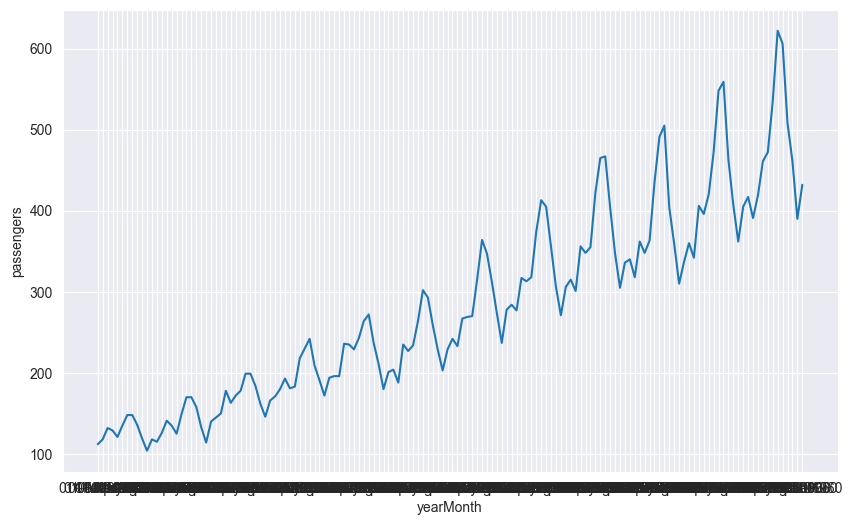

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data = df,x =df.index,y = df.passengers)
plt.show()

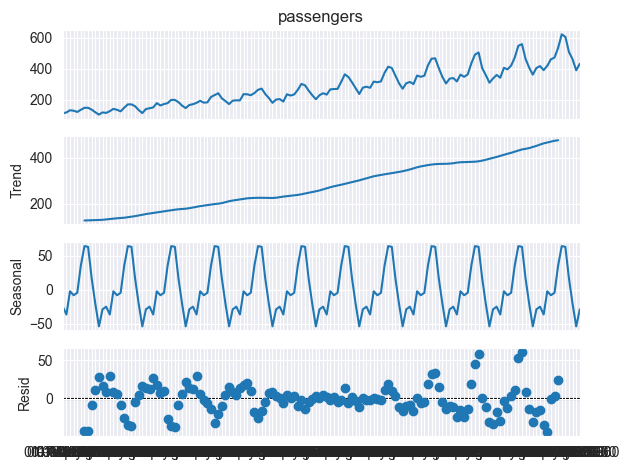

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers, period = 12)
fig = decomposition.plot()
plt.show()

### Stationary Time Series

In [16]:
#check it
df['rollMean'] = df.passengers.rolling(window  = 12).mean()
df['rollStd'] = df.passengers.rolling(window =12 ).std() # mean is same bu variations are very high


no stationery, fail to reject H0


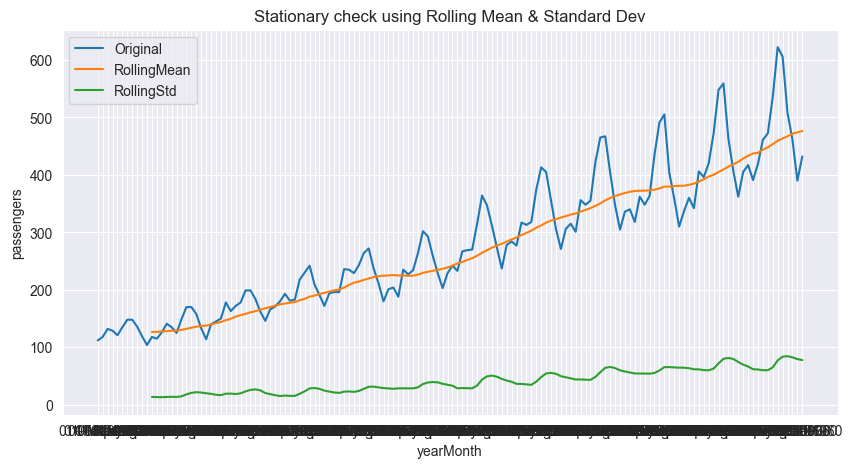

In [18]:
#stationary check(p-value)
def test_stationary(dataFrame,var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window  = 12).std()
    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(dataFrame[var])
    p_value = adf_result[1]
    if p_value <0.85:
        print("Stationary, rejct H0")
    else:
        print('no stationery, fail to reject H0')

    plt.figure(figsize = (10,5))
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = var, label = 'Original')
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'rollMean', label = 'RollingMean')
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'rollStd', label = 'RollingStd')
    plt.title("Stationary check using Rolling Mean & Standard Dev")
    plt.legend()
    plt.show()

test_stationary(df,'passengers')

### ARIMA, ACF, PACF

### Monte Carlo

In [244]:
def roll_dices():
    return np.sum(np.random.randint(1,7,2))

roll_dices()

np.int64(7)

In [221]:
def monte_carlo_simulation(runs = 1000):
    results = np.zeros(2)
    for _ in range(runs):
        if roll_dices() ==7:
            results[0]+=1
        else:
            results[1]+=1
    return results

In [245]:
print(monte_carlo_simulation(100))
print(monte_carlo_simulation(100))
print(monte_carlo_simulation(100))

[ 70. 430.]
[ 56. 344.]


In [246]:
#now do it 1000 times
results = np.zeros(1000)
for i in range(1000):
    results[i] = monte_carlo_simulation()[0]
print(results)

[170. 151. 171. 167. 175. 151. 159. 170. 174. 174. 154. 166. 169. 171.
 168. 155. 177. 180. 162. 184. 174. 178. 177. 147. 168. 183. 160. 171.
 150. 146. 180. 184. 145. 178. 169. 158. 165. 159. 177. 151. 163. 160.
 165. 174. 151. 156. 170. 154. 157. 145. 151. 173. 171. 172. 159. 172.
 156. 157. 164. 149. 161. 172. 153. 178. 187. 185. 162. 160. 164. 186.
 155. 174. 152. 184. 190. 168. 152. 163. 153. 166. 177. 170. 163. 180.
 164. 185. 181. 165. 175. 164. 165. 154. 168. 171. 178. 157. 169. 157.
 154. 161. 141. 150. 172. 150. 175. 169. 167. 151. 161. 145. 163. 163.
 157. 163. 172. 149. 165. 164. 152. 172. 144. 158. 168. 183. 157. 172.
 172. 164. 162. 160. 173. 177. 160. 176. 186. 174. 163. 179. 167. 172.
 173. 151. 181. 182. 144. 169. 162. 162. 159. 170. 171. 165. 172. 168.
 149. 165. 169. 169. 145. 162. 162. 169. 177. 155. 168. 201. 189. 160.
 164. 153. 152. 169. 175. 165. 147. 185. 184. 168. 168. 171. 173. 143.
 186. 148. 172. 192. 169. 160. 178. 172. 177. 165. 192. 181. 164. 145.
 164. 

In [322]:
#win losses
print(results.mean())
print(results.mean()*4.5)
#lossing losess * 1-> 1 $

166.177
747.7964999999999
